### Correlation & Regression

Correlation is a measure of the dependence/proportionality of one variable and another. In other words, how one variable rises or falls with another. Correlation does not imply causation, though causation implies correlation (though not necessarily linear), so correlation suggest at causation, at least in the absence of an obvious lack of possible mechanisms.

The value of the correlation (i.e., correlation coefficient) does not depend on the specific measurement units used; for example, the correlation between height and weight will be identical regardless of whether inches and pounds, or centimeters and kilograms are used as measurement units. Proportional means linearly related; that is, the correlation is high if it can be approximated by a straight line (sloped upwards or downwards). This line is called the regression line or least squares line, because it is determined such that the sum of the squared distances of all the data points from the line is the lowest possible.

There are multiple measures of correlation, Pearson's r being the most commonly used.

Correlation does have some quirks important to note. Outliers can produce counter-intuitive results and render it useless. Curves with clear non-linear relationships does not correlate linearly.

* https://en.wikipedia.org/wiki/Correlation_and_dependence
* https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress
* https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
* http://www.statsoft.com/Textbook/Statistics-Glossary/P/button/p#Pearson%20Correlation
* https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Definition
* https://en.wikipedia.org/wiki/Covariance
https://stats.stackexchange.com/questions/26300/does-causation-imply-correlation

#### Pearson's r

* Pearson correlation coefficient (PCC)
* Pearson product-moment correlation coefficient (PPMCC)
* Bi-variate correlation

Pearson's r is a measure of the linear proportionality between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. It is widely used in the sciences.

We begin by selecting two series of numerical data of equal length, one for the x-axis and one for the y-axis. What we are trying to find out is how much the y-axis changes in response to a 1 unit increase in the x-axis.

The idea of correlation is easy to grasp, its intuitive meaning being very clear, but its technical definition is a bit more involved. We first have to seperate description and estimation. 

For describing population correlation:

$$\rho _{X,Y}={\frac {cov_{x,y}}{\sigma _{X}\sigma _{Y}}}$$

where: 

* $\rho _{X,Y}$ is population version of Pearson's r for ${\displaystyle X}$ and ${\displaystyle Y}$
* $cov_{x,y}$ is the POPULATION covariance
* ${\displaystyle \sigma _{X}}$ and ${\displaystyle \sigma _{Y}}$ are the standard deviations of ${\displaystyle X}$ and ${\displaystyle Y}$

For estimating population correlation:

$$r_{xy}={\frac {cov_{x,y}}{{s_{x}}{s_{y}}}}$$


where:

* $r_{xy}$ is the sample version of Pearon's r for ${\displaystyle X}$ and ${\displaystyle Y}$
* $cov_{x,y}$ is the SAMPLE covariance
* ${s_{x}}$ and ${s_{y}}$ are the sample standard deviations for ${\displaystyle X}$ and ${\displaystyle Y}$


#### Covariance

We need to understand co-variance to understand correlation. Its definition is quite simple.

$$cov_{x,y}=\mathbf{E} {{\big [}(X-\mathbf{E} [X])(Y-\mathbf{E} [Y]){\big ]}}$$

The expected value,  E[X], is also called the first raw moment or the mean. It can be compared to the balance point of a physical object. In normal language this formula is expressed as "the mean of the product of the deviations of each value from their respective means". 

We have to seperate two cases, one where we are looking for the correlation of two vectors representing the whole of their populations, and the case where we are trying to estime the population correlation from sample vectors.

For population data:

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\mu{X})(y_{i}-\mu{Y})}{N}$$

For sample data:

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

Algorithm:

1. We first calculate the mean of X and Y.
2. Then we start at place 1 in X and 1 in Y.
3. We calculate the deviation from the mean.
4. We then multiply the deviations together.
5. We repeat this for all value of X and Y.
6. Finally, we take the mean of the list of products.



* http://www.wikihow.com/Calculate-Covariance

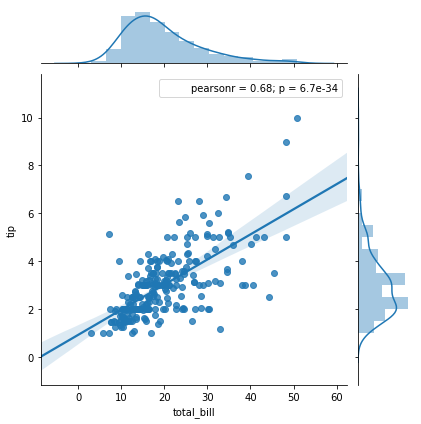

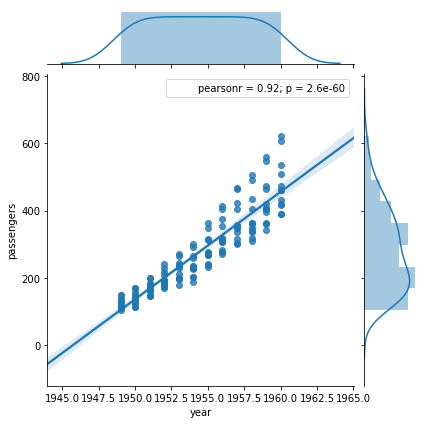

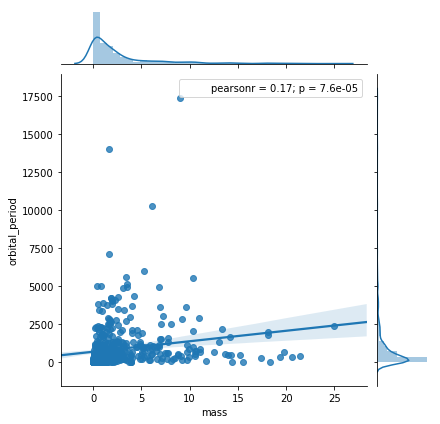

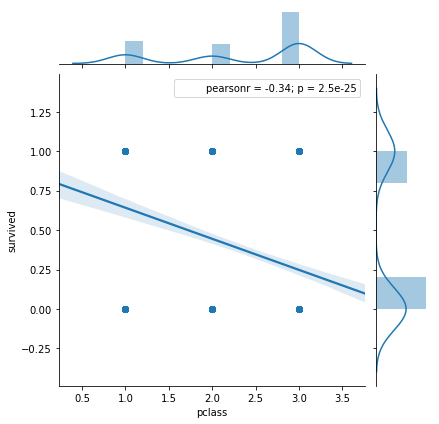

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1)
tips    = sns.load_dataset("tips")
sns.jointplot("total_bill", "tip", tips, kind='reg')

plt.figure(2)
flights = sns.load_dataset('flights')
sns.jointplot("year", "passengers", flights, kind='reg')

plt.figure(3)
planets = sns.load_dataset('planets')
sns.jointplot("mass", "orbital_period", planets, kind='reg')

plt.figure(4)
titanic = sns.load_dataset('titanic')
sns.jointplot("pclass", "survived", titanic, kind='reg')

plt.show()

References:

[7]

* https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
* https://github.com/mwaskom/seaborn-data/blob/master/flights.csv
* https://github.com/mwaskom/seaborn-data/blob/master/planets.csv
* https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

#### Extreme and curious cases

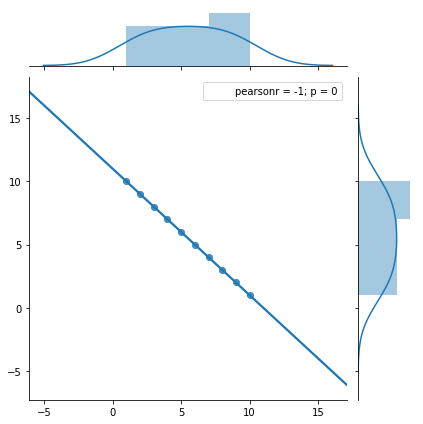

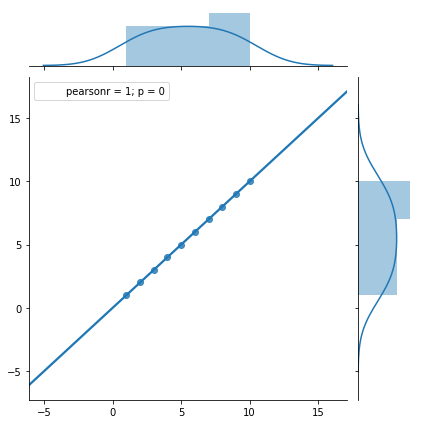

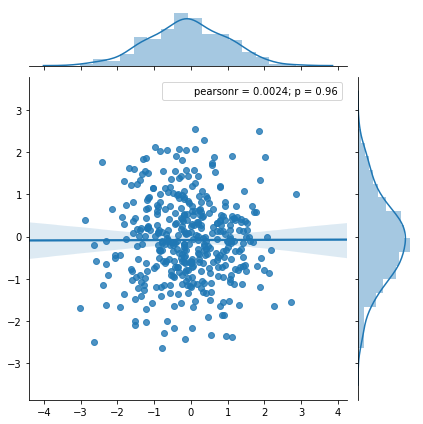

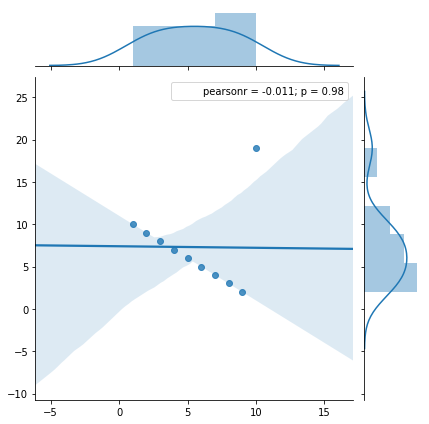

In [16]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Perfect negative correlation
x = np.arange(1,11,1)
y = np.arange(1,11,1)
y = np.flipud(y)

plt.figure(1)
sns.jointplot(x, y, kind='reg')

# Perfect positive correlation
x = np.arange(1,11,1)
y = np.arange(1,11,1)

plt.figure(2)
sns.jointplot(x, y, kind='reg')

# No correlation
plt.figure(3)

sample_size = 400
x = st.norm.rvs(size=sample_size)
y = st.norm.rvs(size=sample_size)

sns.jointplot(x, y, kind='reg')

# No correlation because outlier

x = np.arange(1,11,1)
y = np.arange(1,11,1)
y = np.flipud(y)
y[9] = 19.6
#y[8] = 10

plt.figure(4)
sns.jointplot(x, y, kind='reg')

# Show all plots
plt.show()